In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [3]:
import pandas as pd
import numpy as np
import matplotlib as plot
import seaborn as sns

In [5]:
data=pd.read_csv("GenZ_DatingApp_Data.csv")

In [7]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   User_ID                  500 non-null    int64 
 1   Age                      500 non-null    int64 
 2   Gender                   500 non-null    object
 3   Location                 500 non-null    object
 4   Education                500 non-null    object
 5   Occupation               500 non-null    object
 6   Primary_App              393 non-null    object
 7   Secondary_Apps           386 non-null    object
 8   Usage_Frequency          500 non-null    object
 9   Daily_Usage_Time         500 non-null    object
 10  Reason_for_Using         500 non-null    object
 11  Satisfaction             500 non-null    int64 
 12  Challenges               383 non-null    object
 13  Desired_Features         500 non-null    object
 14  Preferred_Communication  500 non-null    o

In [9]:
data.head


<bound method NDFrame.head of      User_ID  Age      Gender   Location      Education     Occupation  \
0          1   20  Non-binary  Bangalore  Undergraduate     Freelancer   
1          2   24      Female      Delhi  Undergraduate  Part-time Job   
2          3   24  Non-binary    Kolkata  Undergraduate         Intern   
3          4   22  Non-binary      Delhi       Graduate  Full-time Job   
4          5   18        Male      Delhi       Graduate         Intern   
..       ...  ...         ...        ...            ...            ...   
495      496   23      Female     Mumbai  Undergraduate         Intern   
496      497   23        Male     Mumbai   Postgraduate         Intern   
497      498   22        Male  Hyderabad       Graduate     Freelancer   
498      499   21      Female    Kolkata       Graduate        Student   
499      500   22        Male     Mumbai       Graduate  Part-time Job   

    Primary_App Secondary_Apps Usage_Frequency Daily_Usage_Time  \
0         Hing

In [13]:
#Gender influence dating app preferences
gender_app_preferences = data.groupby(['Gender', 'Primary_App']).size().unstack(fill_value=0)
print(gender_app_preferences)

Primary_App  Bumble  Hinge  OkCupid  Tinder
Gender                                     
Female           39     35       39      23
Male             29     29       46      28
Non-binary       25     42       33      25


In [ ]:
# we can notice that the gender influence app preferences so then it will be yes 

In [29]:
# people using multiple dating apps simultanuously 
app_users = data[data['Secondary_Apps'] != 'None'].shape[0]
total_users= data.shape[0]
multiple_apps=(app_users/total_users)* 100
print(f'Number of using multiple apps:{app_users}')
print(f'Total number of users : {total_users}')
print(f'Percentage of user using multiple apps:{multiple_apps}')

Number of using multiple apps:500
Total number of users : 500
Percentage of user using multiple apps:100.0


In [31]:
app_users = data[data['Primary_App'] != 'None'].shape[0]
total_users= data.shape[0]
multiple_apps=(app_users/total_users)* 100
print(f'Number of using multiple apps:{app_users}')
print(f'Total number of users : {total_users}')
print(f'Percentage of user using multiple apps:{multiple_apps}')

Number of using multiple apps:500
Total number of users : 500
Percentage of user using multiple apps:100.0


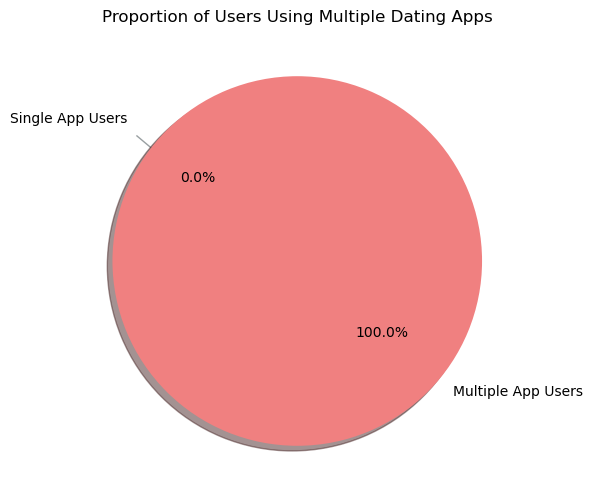

In [39]:
import matplotlib.pyplot as plt
labels = ['Single App Users', 'Multiple App Users']
sizes = [total_users - app_users, app_users]
colors = ['lightblue', 'lightcoral']
explode = (0.1, 0)  
plt.figure(figsize=(6, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Proportion of Users Using Multiple Dating Apps')
plt.show()
# Yes,it shows us that people are using multiple apps simultaneously

In [47]:
#Age groups that is mostly active on the dating apps
bins = [18,20,23,25]
labels = ['18-20','21-23','24-25']
data['Age_Group']= pd.cut(data['Age'] ,bins=bins,labels=labels, right= False)
print(data[['Age','Age_Group']].head())

   Age Age_Group
0   20     21-23
1   24     24-25
2   24     24-25
3   22     21-23
4   18     18-20


In [51]:
# Map Usage_Frequency to numerical values
usage_frequency_map = {
    'Daily': 7,
    'Weekly': 1,
    'Monthly': 0.25
}
data['Usage_Frequency_Score'] = data['Usage_Frequency'].map(usage_frequency_map)
# Calculate average usage frequency score by age group
avg_usage_frequency = data.groupby('Age_Group')['Usage_Frequency_Score'].mean()
# Display the results
print("Average Usage Frequency Score by Age Group:")
print(avg_usage_frequency)

Average Usage Frequency Score by Age Group:
Age_Group
18-20    2.796371
21-23    2.650000
24-25    3.137755
Name: Usage_Frequency_Score, dtype: float64


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18888\1088600743.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_usage_frequency = data.groupby('Age_Group')['Usage_Frequency_Score'].mean()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_18888\3484475446.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_usage_frequency.index, y=avg_usage_frequency.values, palette='magma')


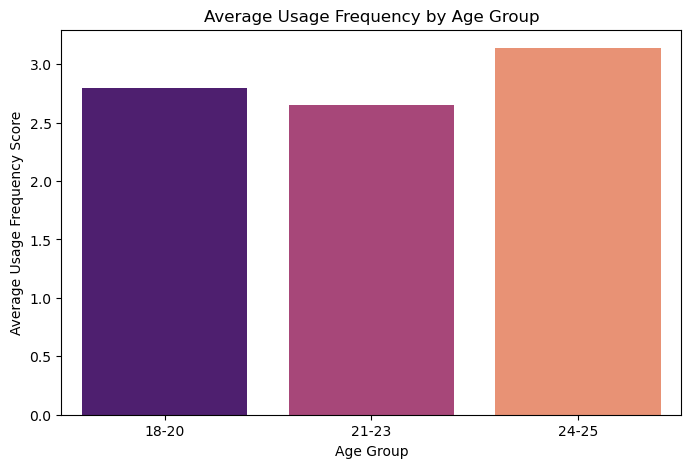

In [62]:
plt.figure(figsize=(8, 5))
# Create a bar plot for average usage frequency
sns.barplot(x=avg_usage_frequency.index, y=avg_usage_frequency.values, palette='magma')
plt.title('Average Usage Frequency by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Usage Frequency Score')
plt.show()

In [ ]:
# we can see that the group of 24-25 is the one that is mostly active on the dating 

In [68]:
# people in urban vs rural areas show different usage patterns 
# yes , they show different usage patterns

In [84]:
urban_cities = ['Bangalore', 'Delhi', 'Mumbai', 'Chennai', 'Hyderabad', 'Kolkata', 'Pune']
data['Area_Type'] = data['Location'].apply(lambda x: 'Urban' if x in urban_cities else 'Rural')
print(data[['Location', 'Area_Type']].head())

    Location Area_Type
0  Bangalore     Urban
1      Delhi     Urban
2    Kolkata     Urban
3      Delhi     Urban
4      Delhi     Urban


In [86]:
usage_frequency_map = {
    'Daily': 7,
    'Weekly': 1,
    'Monthly': 0.25
}
data['Usage_Frequency_Score'] = data['Usage_Frequency'].map(usage_frequency_map)
avg_usage_frequency = data.groupby('Area_Type')['Usage_Frequency_Score'].mean()
print("Average Usage Frequency Score by Area Type:")
print(avg_usage_frequency)

Average Usage Frequency Score by Area Type:
Area_Type
Urban    2.935
Name: Usage_Frequency_Score, dtype: float64


In [88]:
primary_app_preferences = data.groupby(['Area_Type', 'Primary_App']).size().unstack(fill_value=0)
print("Primary App Preferences by Area Type:")
print(primary_app_preferences)

Primary App Preferences by Area Type:
Primary_App  Bumble  Hinge  OkCupid  Tinder
Area_Type                                  
Urban            93    106      118      76
